# ⛴️ Winds in Chesapeake Bay

In [35]:
from datetime import datetime

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from herbie.toolbox import EasyMap

import synoptic

In [48]:
df = synoptic.TimeSeries(
    start=datetime(2017, 8, 1),
    end=datetime(2017, 8, 7),
    vars=["wind_speed", "wind_direction", "wind_gust"],
    stid=["YKRV2", "44072", "WDSV2", "CBBV2"],
).df()
df

🚚💨 Speedy delivery from Synoptic timeseries service.
📦 Received data from 4 stations.


date_time,variable,sensor_index,is_derived,value,units,id,stid,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,is_restricted,is_active
"datetime[μs, UTC]",str,u32,bool,f64,str,u32,str,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool
2017-08-01 00:00:00 UTC,"""wind_gust""",1,false,4.02,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
2017-08-01 00:06:00 UTC,"""wind_gust""",1,false,4.47,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
2017-08-01 00:12:00 UTC,"""wind_gust""",1,false,3.58,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
2017-08-01 00:18:00 UTC,"""wind_gust""",1,false,4.47,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
2017-08-01 00:24:00 UTC,"""wind_gust""",1,false,4.47,"""m/s""",23426,"""YKRV2""","""York River East Rear Range Lig…",0.0,37.25,-76.3333,121,"""VA""","""America/New_York""",0.0,2016-12-14 16:49:00 UTC,2023-08-16 12:54:00 UTC,false,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2017-08-06 23:20:00 UTC,"""wind_gust""",1,false,8.99,"""m/s""",60116,"""44072""","""York Spit""",0.0,37.2,-76.3,96,"""VA""","""America/New_York""",0.0,2016-07-22 17:08:00 UTC,2024-11-10 00:54:00 UTC,false,true
2017-08-06 23:30:00 UTC,"""wind_gust""",1,false,8.99,"""m/s""",60116,"""44072""","""York Spit""",0.0,37.2,-76.3,96,"""VA""","""America/New_York""",0.0,2016-07-22 17:08:00 UTC,2024-11-10 00:54:00 UTC,false,true
2017-08-06 23:40:00 UTC,"""wind_gust""",1,false,7.99,"""m/s""",60116,"""44072""","""York Spit""",0.0,37.2,-76.3,96,"""VA""","""America/New_York""",0.0,2016-07-22 17:08:00 UTC,2024-11-10 00:54:00 UTC,false,true


In [49]:
df.select("stid", "latitude", "longitude").unique()

stid,latitude,longitude
str,f64,f64
"""WDSV2""",36.9817,-76.3217
"""CBBV2""",36.96667,-76.11333
"""44072""",37.2,-76.3
"""YKRV2""",37.25,-76.3333


<GeoAxes: xlabel='longitude', ylabel='latitude'>

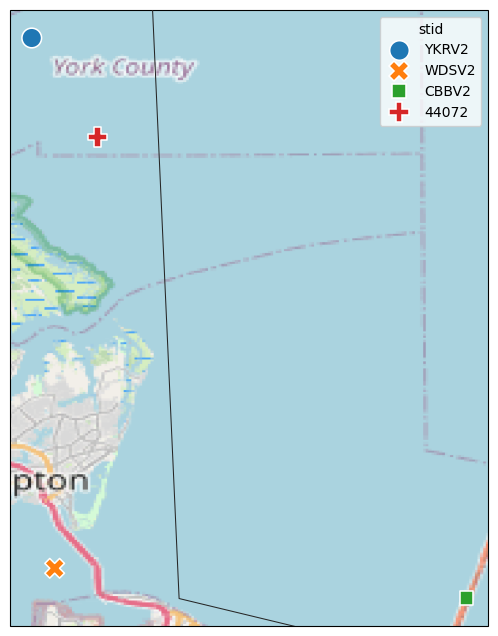

In [50]:
ax = EasyMap(figsize=(8, 8)).OSM(zoom=10).ax

sns.scatterplot(
    df.select("stid", "latitude", "longitude").unique(),
    x="longitude",
    y="latitude",
    style="stid",
    hue="stid",
    s=200,
)

<Axes: xlabel='date_time', ylabel='value'>

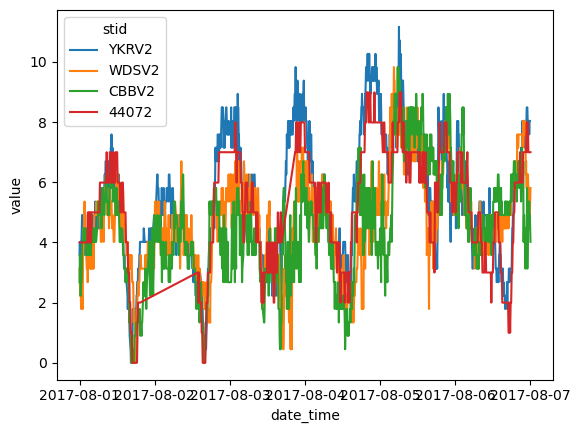

In [51]:
sns.lineplot(
    df.filter(variable="wind_speed"),
    x="date_time",
    y="value",
    hue="stid",
)

<Axes: xlabel='date_time', ylabel='value'>

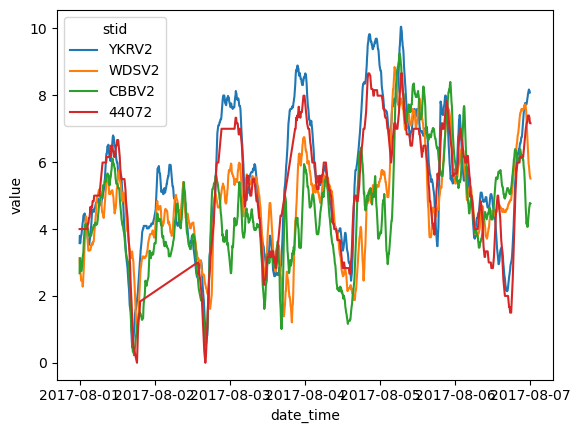

In [52]:
# Compute 60-min average wind speed

df_smoothed = (
    df.filter(variable="wind_speed", sensor_index=1)
    .sort("date_time")
    .rolling("date_time", period="60m", group_by="stid")
    .agg(pl.col("value").mean())
)

sns.lineplot(
    df_smoothed,
    x="date_time",
    y="value",
    hue="stid",
)

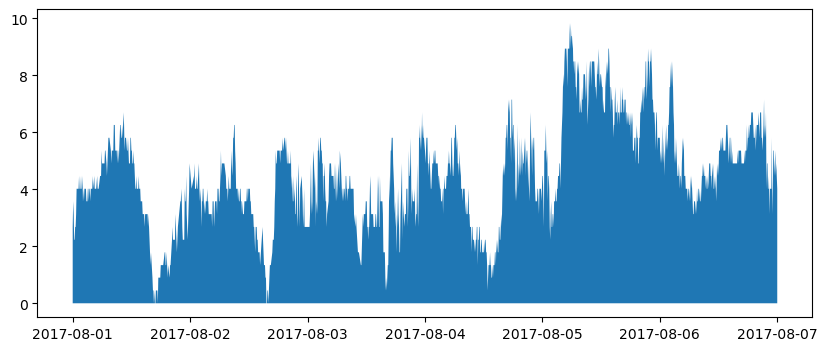

In [57]:
stid = "CBBV2"

a = df.filter(stid=stid).synoptic.pivot()

fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.fill_between(a["date_time"], a["wind_speed"])

In [54]:
a.synoptic.pivot()

date_time,stid,latitude,longitude,elevation,wind_direction,wind_speed,wind_gust
"datetime[μs, UTC]",str,f64,f64,f64,f64,f64,f64
2017-08-01 00:00:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,139.0,2.68,4.91
2017-08-01 00:06:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,133.0,3.58,4.91
2017-08-01 00:12:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,138.0,3.13,4.47
2017-08-01 00:18:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,140.0,2.23,4.02
2017-08-01 00:24:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,146.0,2.23,3.58
…,…,…,…,…,…,…,…
2017-08-06 23:30:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,126.0,4.91,6.7
2017-08-06 23:36:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,127.0,5.36,7.15
2017-08-06 23:42:00 UTC,"""CBBV2""",36.96667,-76.11333,0.0,125.0,4.47,6.7
